In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [20]:
df = pd.read_csv('./news-corpus-df.csv')
print(df.shape)
# make a column id for each row and make it the first column
df.insert(0, 'id', range(0, len(df)))
df.head()

(260, 10)


,id,date,main_headline,authors,description,source,bias,headline,link,text,text_len
0,0,6/22/2020,b'Trump Admin Suspends Certain Visas Through E...,"Hamed Aleaziz, Jeremy Singer-Vine, Adolfo Flor...",The Trump administration announced Monday that...,BuzzFeed News,Left,b'Trump Is Suspending Certain Visas For Foreig...,https://www.buzzfeednews.com/article/adolfoflo...,BuzzFeed News has reporters around the world b...,3358
1,1,6/22/2020,b'Trump Admin Suspends Certain Visas Through E...,"Ted Hesson, Min Read",The Trump administration announced Monday that...,Reuters,Center,b'Trump to suspend entry of certain foreign wo...,https://www.reuters.com/article/us-usa-immigra...,WASHINGTON (Reuters) - U.S. President Donald T...,6015
2,2,6/22/2020,b'Trump Admin Suspends Certain Visas Through E...,NaN,The Trump administration announced Monday that...,The Daily Caller,Right,b'Trump To Suspend Visas Through End Of The Ye...,https://dailycaller.com/2020/06/22/exclusive-t...,President Donald Trump will sign an executive ...,1954
3,3,4/24/2020,b'Perspectives Trump s Immigration Executive O...,"Ted Hesson, Min Read",President Donald Trump's executive order suspe...,Reuters,Center,"b""Inside Trump's proposal to suspend some lega...",https://af.reuters.com/article/worldNews/idAFK...,WASHINGTON (Reuters) - President Donald Trump ...,5310
4,4,4/24/2020,b'Perspectives Trump s Immigration Executive O...,Opinion Rafia Zakaria,President Donald Trump's executive order suspe...,CNN - Editorial,Left,"b""Trump's moves on immigration reveal his true...",https://www.cnn.com/2020/04/22/opinions/trump-...,"Rafia Zakaria is the author of "" The Upstairs ...",8191


In [5]:
example = df['text'][50]
print(example)

President Trump won two victories on his border agenda Friday, with the Supreme Court allowing the use of military funds to expand the barrier on the Mexican border while Guatemala agreed to serve as gatekeeper for asylum seekers trying to get to the U.S.
In a 5-4 decision, the justices of the U.S. high court said President Trump can shift about $2.5 billion in military funds to construct an additional 100 miles of wall at the U.S.-Mexico border in an effort to seal off the U.S. from illegal immigration.
...


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['President',
 'Trump',
 'won',
 'two',
 'victories',
 'on',
 'his',
 'border',
 'agenda',
 'Friday']

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilyguan/nltk_data...


True

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
print(sia.polarity_scores('I am so happy!')) # Return a float for sentiment strength based on the input text
print(sia.polarity_scores('This is the worst thing ever.'))
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


{'neg': 0.051, 'neu': 0.832, 'pos': 0.117, 'compound': 0.765}

In [16]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    # todo: split text to analyze word position, content

    res[i] = sia.polarity_scores(text)

  0%|          | 0/260 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,id,neg,neu,pos,compound,date,main_headline,authors,description,source,bias,headline,link,text,text_len
0,0,0.076,0.862,0.062,-0.9362,6/22/2020,b'Trump Admin Suspends Certain Visas Through E...,"Hamed Aleaziz, Jeremy Singer-Vine, Adolfo Flor...",The Trump administration announced Monday that...,BuzzFeed News,Left,b'Trump Is Suspending Certain Visas For Foreig...,https://www.buzzfeednews.com/article/adolfoflo...,BuzzFeed News has reporters around the world b...,3358
1,1,0.067,0.873,0.060,-0.8376,6/22/2020,b'Trump Admin Suspends Certain Visas Through E...,"Ted Hesson, Min Read",The Trump administration announced Monday that...,Reuters,Center,b'Trump to suspend entry of certain foreign wo...,https://www.reuters.com/article/us-usa-immigra...,WASHINGTON (Reuters) - U.S. President Donald T...,6015
2,2,0.076,0.817,0.107,0.7531,6/22/2020,b'Trump Admin Suspends Certain Visas Through E...,NaN,The Trump administration announced Monday that...,The Daily Caller,Right,b'Trump To Suspend Visas Through End Of The Ye...,https://dailycaller.com/2020/06/22/exclusive-t...,President Donald Trump will sign an executive ...,1954
3,3,0.065,0.819,0.116,0.9886,4/24/2020,b'Perspectives Trump s Immigration Executive O...,"Ted Hesson, Min Read",President Donald Trump's executive order suspe...,Reuters,Center,"b""Inside Trump's proposal to suspend some lega...",https://af.reuters.com/article/worldNews/idAFK...,WASHINGTON (Reuters) - President Donald Trump ...,5310
4,4,0.085,0.818,0.097,0.9478,4/24/2020,b'Perspectives Trump s Immigration Executive O...,Opinion Rafia Zakaria,President Donald Trump's executive order suspe...,CNN - Editorial,Left,"b""Trump's moves on immigration reveal his true...",https://www.cnn.com/2020/04/22/opinions/trump-...,"Rafia Zakaria is the author of "" The Upstairs ...",8191


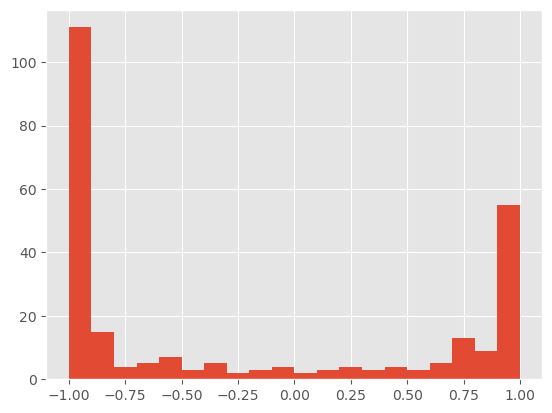

In [23]:
# histogram of compound ranges
vaders['compound'].hist(bins=20)
plt.show()


# Roberta pretrained transformer

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

ModuleNotFoundError: No module named 'transformers'